In [5]:
import numpy as np
import matplotlib.pyplot as plt
import imp
import os
from jupyterthemes import jtplot
import pandas
import seaborn as sb
jtplot.style(theme='oceans16', context='notebook', ticks=True, grid=True)
plt.rcParams["figure.figsize"] = (10,6)
os.add_dll_directory('C:\\Program Files\\Lumerical\\v231\\api\\python\\')
lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v231\\api\\python\\lumapi.py') 


In [2]:
mode = lumapi.MODE()

# Calculo Neff

In [3]:
core_material = 'Si (Silicon) - Palik'
sub_material = 'SiO2 (Glass) - Palik'
comprimento = 1547.5e-9
h = 211.4e-9
W1 = 500e-9
W2 = 520e-9
mode.switchtolayout()
mode.selectall()
mode.delete()

mode.addrect()
mode.set('x min',0)
mode.set('x max',1e-6)
mode.set('z',0)
mode.set('z span',h)
mode.set('y',0)
mode.set('y span',W1)
mode.set('material',core_material)

mode.addfde()
mode.set('solver type','2D X normal')
mode.set('x',0.5e-6)
mode.set('z',0)
mode.set('z span',5e-6)
mode.set('y',0)
mode.set('y span',6e-6)
mode.set('background material',sub_material)
mode.set('mesh cells y',600)
mode.set('mesh cells z',600)
mode.set('y min bc','PML')
mode.set('y max bc','PML')
mode.set('z min bc','PML')
mode.set('z max bc','PML')
mode.set('wavelength',comprimento)
mode.set('number of trial modes',3)

mode.addmesh()
mode.set('x min',0)
mode.set('x max',1e-6)
mode.set('z',0)
mode.set('z span',h*1.2)
mode.set('y',0)
mode.set('y span',W1*1.2)
mode.set('dy',0.01e-6)
mode.set('dz',0.01e-6)

mode.run()
mode.findmodes()
neff1 = np.real(mode.getresult('FDE::data::mode1','neff')[0][0])

mode.switchtolayout()
mode.selectall()
mode.delete()

mode.addrect()
mode.set('x min',0)
mode.set('x max',1e-6)
mode.set('z',0)
mode.set('z span',h)
mode.set('y',0)
mode.set('y span',W2)
mode.set('material',core_material)

mode.addfde()
mode.set('solver type','2D X normal')
mode.set('x',0.5e-6)
mode.set('z',0)
mode.set('z span',5e-6)
mode.set('y',0)
mode.set('y span',6e-6)
mode.set('background material',sub_material)
mode.set('mesh cells y',300)
mode.set('mesh cells z',300)
mode.set('y min bc','PML')
mode.set('y max bc','PML')
mode.set('z min bc','PML')
mode.set('z max bc','PML')
mode.set('wavelength',comprimento)
mode.set('number of trial modes',3)

mode.addmesh()
mode.set('x min',0)
mode.set('x max',1e-6)
mode.set('z',0)
mode.set('z span',h*1.2)
mode.set('y',0)
mode.set('y span',W2*1.2)
mode.set('dy',0.01e-6)
mode.set('dz',0.01e-6)

mode.run()
mode.findmodes()
neff2 = np.real(mode.getresult('FDE::data::mode1','neff')[0][0])

print('neff W1 = {}'.format(neff1))
print('neff W2 = {}'.format(neff2))
print('Delta neff = {}'.format(neff2-neff1))

neff W1 = 2.4165588465529897
neff W2 = 2.444451486918986
Delta neff = 0.027892640365996257


# Calculo L ou deltaNeff

In [4]:
L = 0
deltaneff = 0.027892640365996257
comprimento = 1547.5e-9
Fasedif = np.pi/4 #45 Graus

if(L == 0):
    L = (Fasedif*comprimento)/(np.pi*deltaneff)
    print('L= {} um'.format(L*1e6))

if(deltaneff == 0):
    deltaneff = (Fasedif*comprimento)/(np.pi*L)
    print(deltaneff)

L= 13.870146207873416 um


# FDTD simulation

In [6]:
fdtd = lumapi.FDTD()

In [18]:
W = [491e-9,500e-9,508e-9]
H = [210e-9,211.4e-9,213e-9]


for i in range(len(W)):
    for j in range(len(H)):
        core_material = 'Si (Silicon) - Palik'
        sub_material = 'SiO2 (Glass) - Palik'
        comprimento = 1547.5e-9
        h = H[j]
        W1 = W[i]
        W2 = W[i]+20e-9
        L= 14.15e-6

        PortaY = 5e-6
        PortaZ = 5e-6

        fdtd.switchtolayout()
        fdtd.selectall()
        fdtd.delete()
        fdtd.addrect()
        fdtd.set('x min',0)
        fdtd.set('x max',L)
        fdtd.set('z',0)
        fdtd.set('z span',h)
        fdtd.set('y',PortaY/2)
        fdtd.set('y span',W1)
        fdtd.set('material',core_material)

        fdtd.addpoly()
        vertices = np.array([[0,W1/2],[L/2,W2/2],[L,W1/2],[L,-W1/2],[L/2,-W2/2],[0,-W1/2]])
        fdtd.set('vertices',vertices)
        fdtd.set('x',0)
        fdtd.set('y',(-PortaY-W2)/2)
        fdtd.set('z',0)
        fdtd.set('z span',h)
        fdtd.set('material',core_material)

        fdtd.addfdtd()
        fdtd.set('x min',0)
        fdtd.set('x max',L)
        fdtd.set('y max',PortaY)
        fdtd.set('y min',-PortaY - W2)
        fdtd.set('z',0)
        fdtd.set('z span',PortaZ)
        fdtd.set('background material',sub_material)
        fdtd.set('z min bc','Symmetric')
        fdtd.set('mesh accuracy',5)

        fdtd.addport()
        fdtd.set('injection axis','x-axis')
        fdtd.set('direction','Forward')
        fdtd.set('mode selection','fundamental mode')
        fdtd.set('x',0)
        fdtd.set('y',PortaY/2)
        fdtd.set('y span',PortaY)
        fdtd.set('z',0)
        fdtd.set('z span',PortaZ)
        fdtd.set('number of field profile samples',1)


        fdtd.addport()
        fdtd.set('injection axis','x-axis')
        fdtd.set('direction','Forward')
        fdtd.set('mode selection','fundamental mode')
        fdtd.set('x',0)
        fdtd.set('y',(-PortaY-W2)/2)
        fdtd.set('y span',PortaY)
        fdtd.set('z',0)
        fdtd.set('z span',PortaZ)
        fdtd.set('number of field profile samples',1)

        fdtd.addport()
        fdtd.set('injection axis','x-axis')
        fdtd.set('direction','Backward')
        fdtd.set('mode selection','fundamental mode')
        fdtd.set('x',L)
        fdtd.set('y',PortaY/2)
        fdtd.set('y span',PortaY)
        fdtd.set('z',0)
        fdtd.set('z span',PortaZ)
        fdtd.set('number of field profile samples',1)


        fdtd.addport()
        fdtd.set('injection axis','x-axis')
        fdtd.set('direction','Backward')
        fdtd.set('mode selection','fundamental mode')
        fdtd.set('x',L)
        fdtd.set('y',(-PortaY-W2)/2)
        fdtd.set('y span',PortaY)
        fdtd.set('z',0)
        fdtd.set('z span',PortaZ)
        fdtd.set('number of field profile samples',1)

        fdtd.select('FDTD::ports')
        fdtd.set('monitor frequency points',100)
        fdtd.set('source port','port 1')
        fdtd.setglobalsource('wavelength start',1520e-9)
        fdtd.setglobalsource('wavelength stop',1575e-9)

        fdtd.addprofile()
        fdtd.set('x min',0)
        fdtd.set('x max',L)
        fdtd.set('y max',PortaY)
        fdtd.set('y min',-PortaY - W2)
        fdtd.set('z', 0)
        fdtd.set('override global monitor settings',1)
        fdtd.set('frequency points', 1)

        fdtd.deletesweep('fdtd sweep')
        fdtd.addsweep(3)
        fdtd.setsweep('s-parameter sweep','name','fdtd sweep')
        fdtd.setsweep('fdtd sweep','calculate group delay',0)
        fdtd.setsweep('fdtd sweep','excite all ports',0)
        fdtd.addsweepparameter("fdtd sweep",{"Port":"port 1","Mode":"mode 1","Active":1})
        fdtd.addsweepparameter("fdtd sweep",{"Port":"port 2","Mode":"mode 1","Active":1})
        fdtd.addsweepparameter("fdtd sweep",{"Port":"port 3","Mode":"mode 1","Active":0})
        fdtd.addsweepparameter("fdtd sweep",{"Port":"port 4","Mode":"mode 1","Active":0})

        fdtd.runsweep('fdtd sweep')

        filename = "Phase_Shifter_W-%.1fnm_H-%.1fnm.dat" %(1e9*W[i],1e9*H[j])
        fdtd.exportsweep('fdtd sweep',filename)

# Inter


In [6]:
inter = lumapi.INTERCONNECT(filename='inter.icp')

[1.57215564e-06]


(43.0, 47.0)

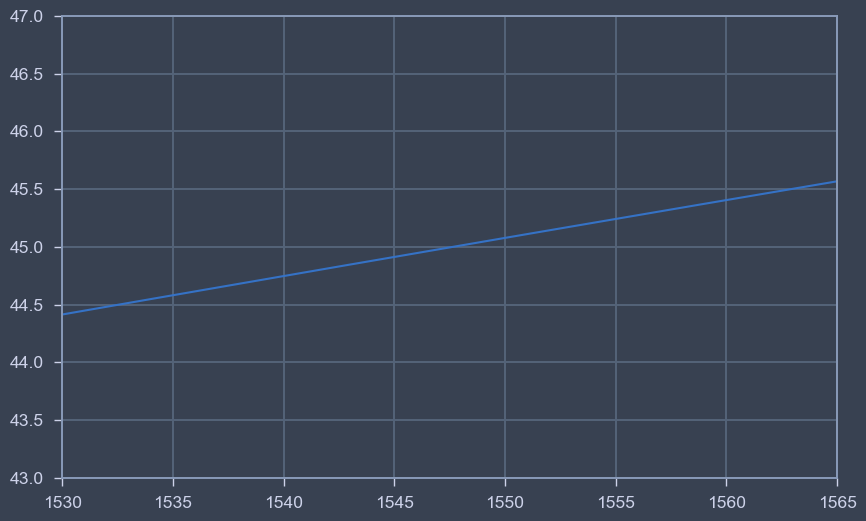

In [19]:
inter.switchtolayout()
inter.run()
Lambda = inter.getresult('ONA_1','input 1/mode 1/angle')['wavelength']
print(Lambda[50])
P1 = inter.getresultdata('ONA_1','input 1/mode 1/angle')
P2 = inter.getresultdata('ONA_2','input 1/mode 1/angle')

plt.plot(Lambda*1e9,(P2-P1)*180/np.pi+360)
plt.xlim(1530,1565)
plt.ylim(43,47)

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, '213.0'), Text(0, 1.5, '211.4'), Text(0, 2.5, '210.0')])

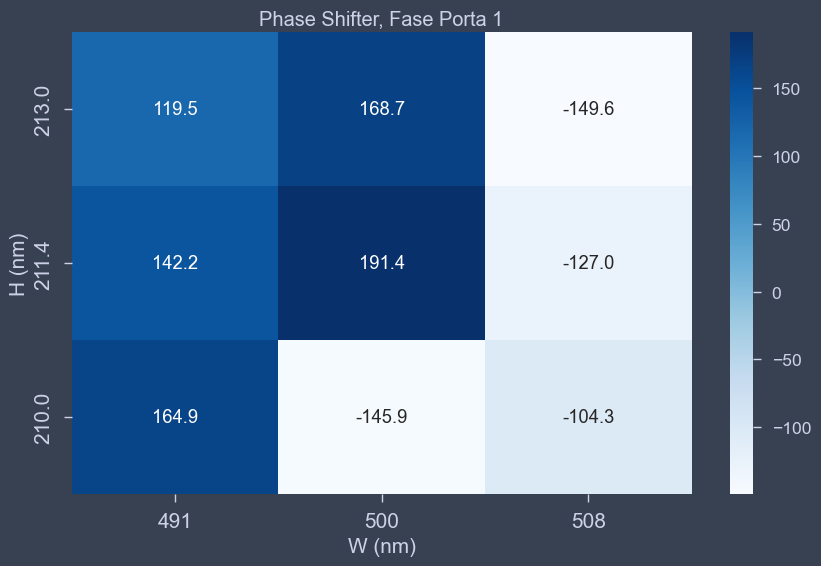

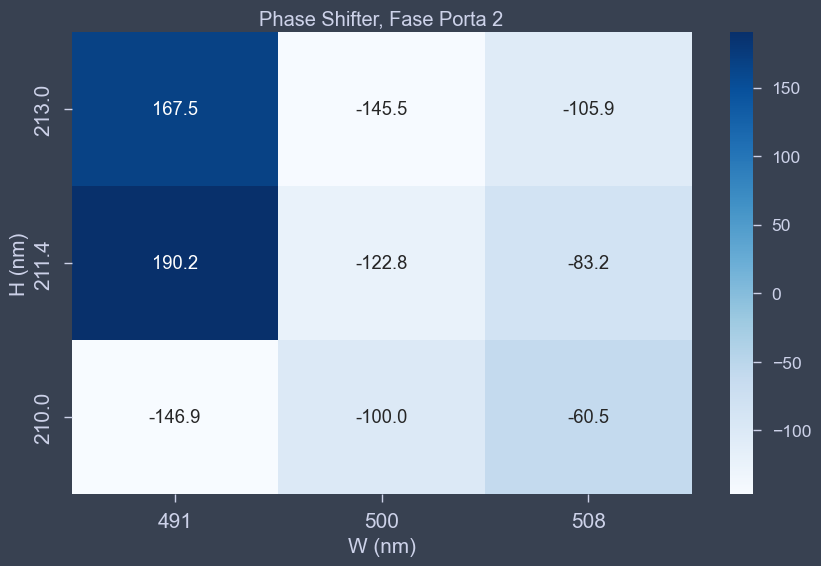

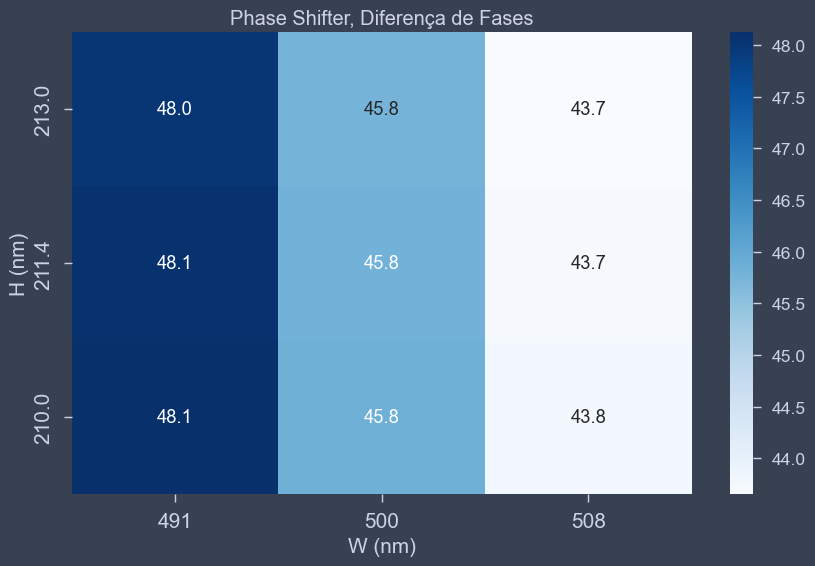

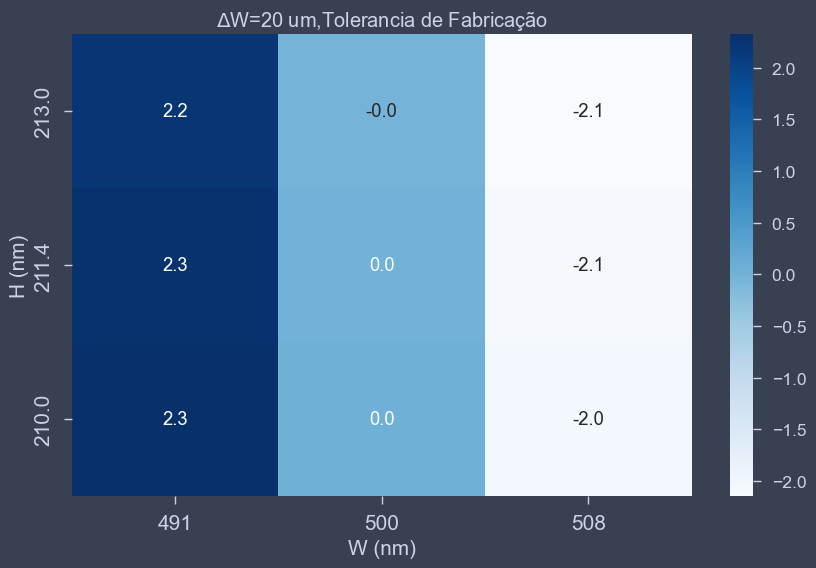

In [7]:
grafico3 = np.zeros([3,3])
grafico4 = np.zeros([3,3])
grafico5 = np.zeros([3,3])
grafico6 = np.zeros([3,3])

W = [491e-9,500e-9,508e-9]
H = [210e-9,211.4e-9,213e-9]
for w in range(len(W)):
    for h in range(len(H)):
        inter.switchtolayout()
        inter.select('SPAR_1')
        inter.set('s parameters filename',"Phase_Shifter_W-%.1fnm_H-%.1fnm.dat" %(1e9*W[w],1e9*H[h]))
        inter.run()
        P1 = inter.getresult('ONA_1','input 1/mode 1/angle')
        P2 = inter.getresult('ONA_2','input 1/mode 1/angle')
        grafico3[h,w] = (P1['mode 1 angle (rad)'][50]*180/np.pi)
        grafico4[h,w] = (P2['mode 1 angle (rad)'][50]*180/np.pi)
        if((P2['mode 1 angle (rad)'][50]-P1['mode 1 angle (rad)'][50])<0):
            grafico5[h,w] = ((P2['mode 1 angle (rad)'][50]-P1['mode 1 angle (rad)'][50])*180/np.pi + 360)
        else:
            grafico5[h,w] = ((P2['mode 1 angle (rad)'][50]-P1['mode 1 angle (rad)'][50])*180/np.pi)
grafico6 = np.subtract(grafico5,grafico5[1][1])

W = np.array([491,500,508])
H = np.array([213,211.4,210])

plt.figure(1)
grafico3 = pandas.DataFrame(grafico3,index=H,columns=W)
sb.heatmap(grafico3, annot=True, fmt=".1f",cmap="Blues")
plt.title('Phase Shifter, Fase Porta 1')
plt.xlabel('W (nm)',fontsize =15)
plt.ylabel('H (nm)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)

plt.figure(2)
grafico4 = pandas.DataFrame(grafico4,index=H,columns=W)
sb.heatmap(grafico4, annot=True, fmt=".1f",cmap="Blues")
plt.title('Phase Shifter, Fase Porta 2')
plt.xlabel('W (nm)',fontsize =15)
plt.ylabel('H (nm)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)

plt.figure(3)
grafico5 = pandas.DataFrame(grafico5,index=H,columns=W)
sb.heatmap(grafico5, annot=True, fmt=".1f",cmap="Blues")
plt.title('Phase Shifter, Diferença de Fases')
plt.xlabel('W (nm)',fontsize =15)
plt.ylabel('H (nm)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)


plt.figure(4)
grafico6 = pandas.DataFrame(grafico6,index=H,columns=W)
sb.heatmap(grafico6, annot=True, fmt=".1f",cmap="Blues")
plt.title(r'$\Delta$W=20 um,Tolerancia de Fabricação')
plt.xlabel('W (nm)',fontsize =15)
plt.ylabel('H (nm)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
